学习R语言时间序列分析。

# 在R中生成时序对象

In [5]:
sales <- c(
    18, 33, 41, 7, 34, 35,
    24, 25, 24, 21, 25, 20,
    22, 31, 40, 29, 25, 21,
    22, 54, 31, 25, 26, 35
)

tssales <- ts(sales, start=c(2003, 1), frequency=12)
tssales

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2003,18,33,41,7,34,35,24,25,24,21,25,20
2004,22,31,40,29,25,21,22,54,31,25,26,35


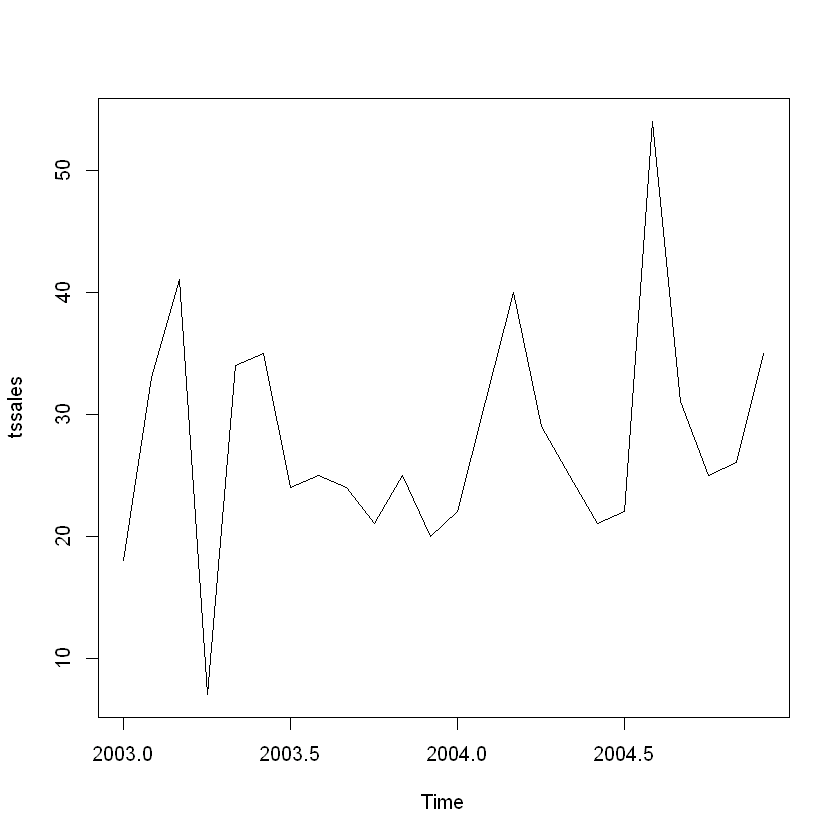

In [6]:
plot(tssales)

In [7]:
start(tssales)

[1] 2003    1

In [8]:
end(tssales)

[1] 2004   12

In [9]:
frequency(tssales)

[1] 12

In [10]:
tssales.subset <- window(tssales, start=c(2003, 5), end=c(2004, 6))
tssales.subset

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2003,,,,,34,35,24,25,24,21,25,20
2004,22,31,40,29,25,21,,,,,,


# 时序的平滑化和季节性分解

## 通过简单移动平均进行平滑处理

In [11]:
install.packages("forecast")

Warning message:
"package 'forecast' is in use and will not be installed"


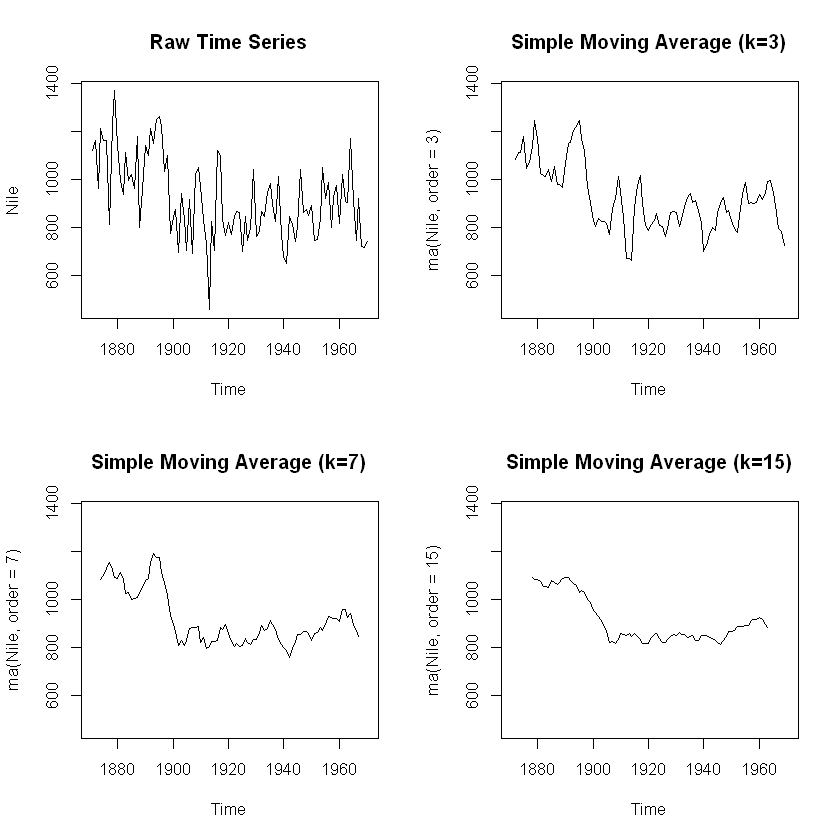

In [12]:
library(forecast)
opar <- par(no.readonly=TRUE)
par(mfrow=c(2, 2))
ylim <- c(min(Nile), max(Nile))
plot(Nile, main="Raw Time Series")
plot(ma(Nile, order=3), main="Simple Moving Average (k=3)", ylim=ylim)
plot(ma(Nile, order=7), main="Simple Moving Average (k=7)", ylim=ylim)
plot(ma(Nile, order=15), main="Simple Moving Average (k=15)", ylim=ylim)
par(opar)

## 季节性分解

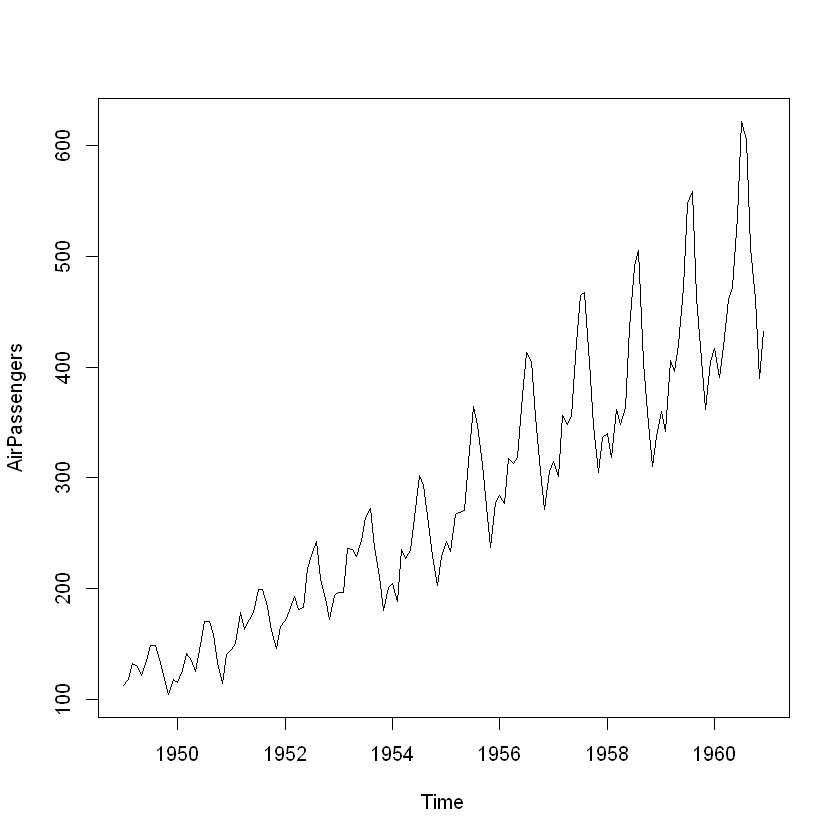

In [13]:
plot(AirPassengers)

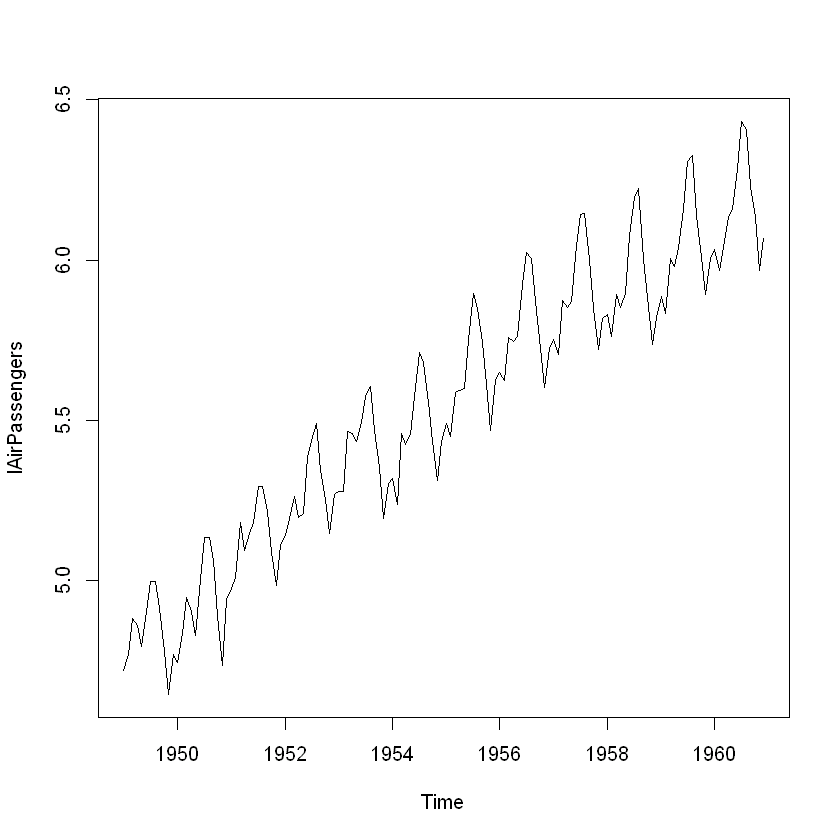

In [14]:
lAirPassengers <- log(AirPassengers)
plot(lAirPassengers)

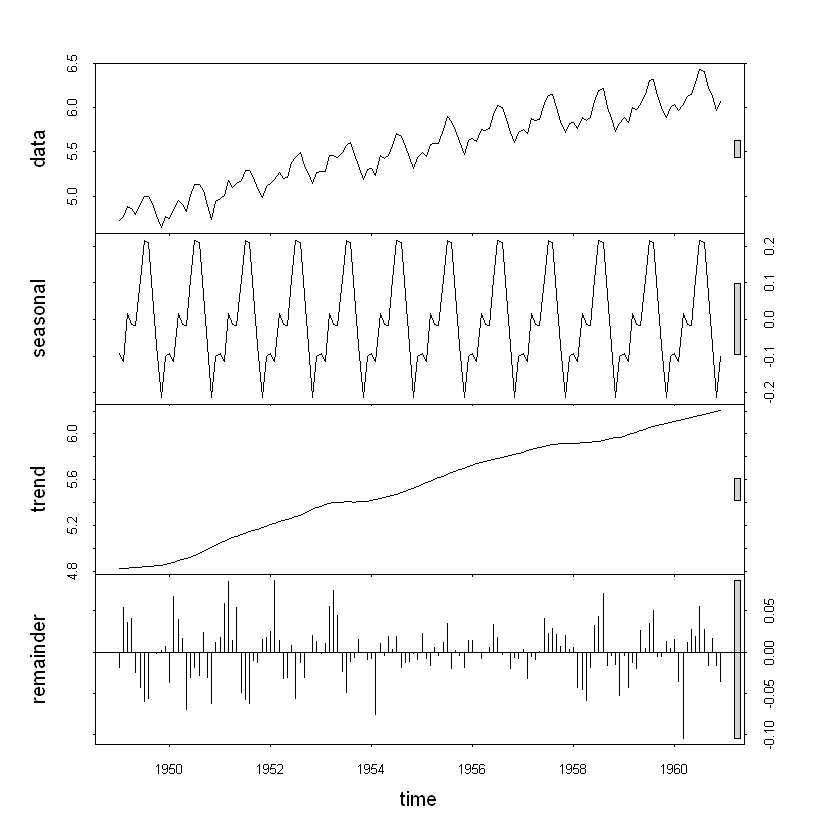

In [15]:
fit <- stl(lAirPassengers, s.window="period")
plot(fit)

In [16]:
fit$time.series

,seasonal,trend,remainder
Jan 1949,-0.09164042,4.829389,-0.0192493585
Feb 1949,-0.11402828,4.830368,0.0543447685
Mar 1949,0.01586585,4.831348,0.0355884457
Apr 1949,-0.01402759,4.833377,0.0404632511
May 1949,-0.01502478,4.835406,-0.0245905300
Jun 1949,0.10978976,4.838166,-0.0426814256
Jul 1949,0.21640041,4.840927,-0.0601151688
Aug 1949,0.20960587,4.843469,-0.0558624690
Sep 1949,0.06747156,4.846011,-0.0008273977
Oct 1949,-0.07024836,4.850883,-0.0015112948


In [17]:
exp(fit$time.series)

,seasonal,trend,remainder
Jan 1949,0.9124332,125.1344,0.9809347
Feb 1949,0.8922327,125.2571,1.0558486
Mar 1949,1.0159924,125.3798,1.0362293
Apr 1949,0.9860703,125.6345,1.0412930
May 1949,0.9850875,125.8897,0.9757094
Jun 1949,1.1160434,126.2377,0.9582166
Jul 1949,1.2415994,126.5866,0.9416561
Aug 1949,1.2331919,126.9088,0.9456692
Sep 1949,1.0697998,127.2318,0.9991729
Oct 1949,0.9321623,127.8533,0.9984898


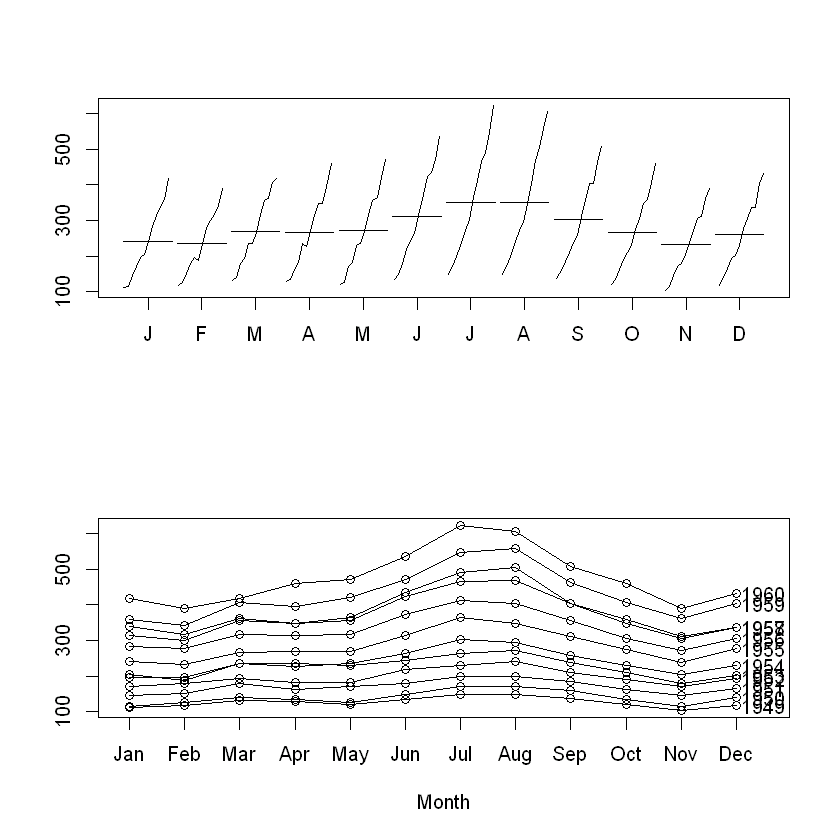

In [18]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(2, 1))
library(forecast)
monthplot(AirPassengers,xlab="", ylab="")
seasonplot(AirPassengers,year.labels=TRUE,main="")
par(opar)

# 指数预测模型

## 单指数平滑

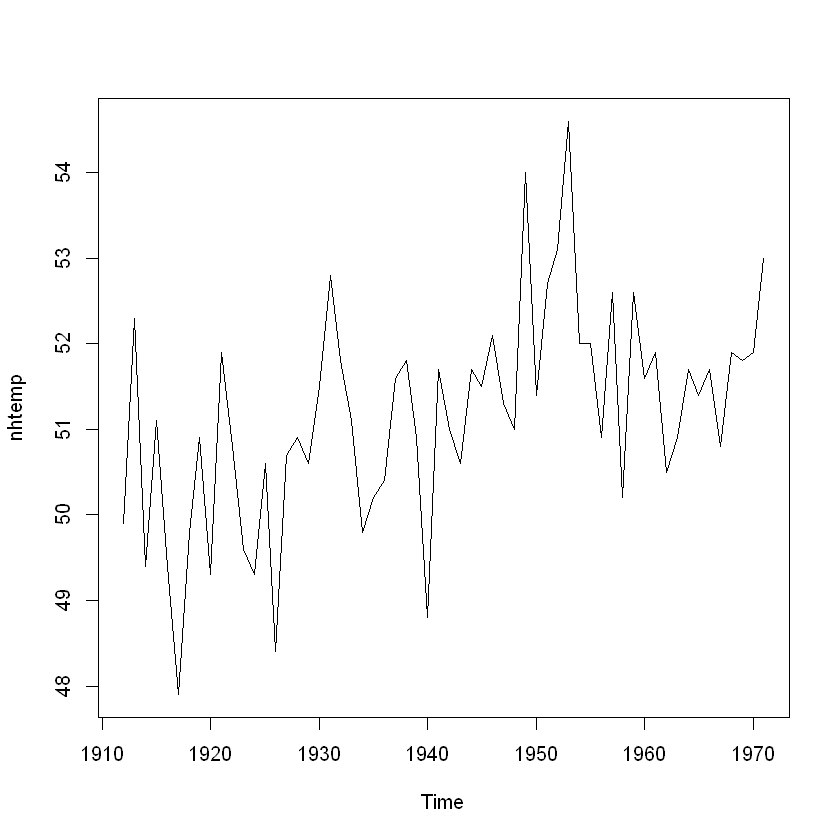

In [19]:
plot(nhtemp)

In [20]:
library(forecast)

# 拟合模型
fit <- ets(nhtemp, model="ANN")
fit

ETS(A,N,N) 

Call:
ets(y = nhtemp, model = "ANN")

  Smoothing parameters:
    alpha = 0.1819 

  Initial states:
    l = 50.2762 

  sigma:  1.1455

     AIC     AICc      BIC 
265.9298 266.3584 272.2129 

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1972       51.87031 50.40226 53.33835 49.62512 54.11549

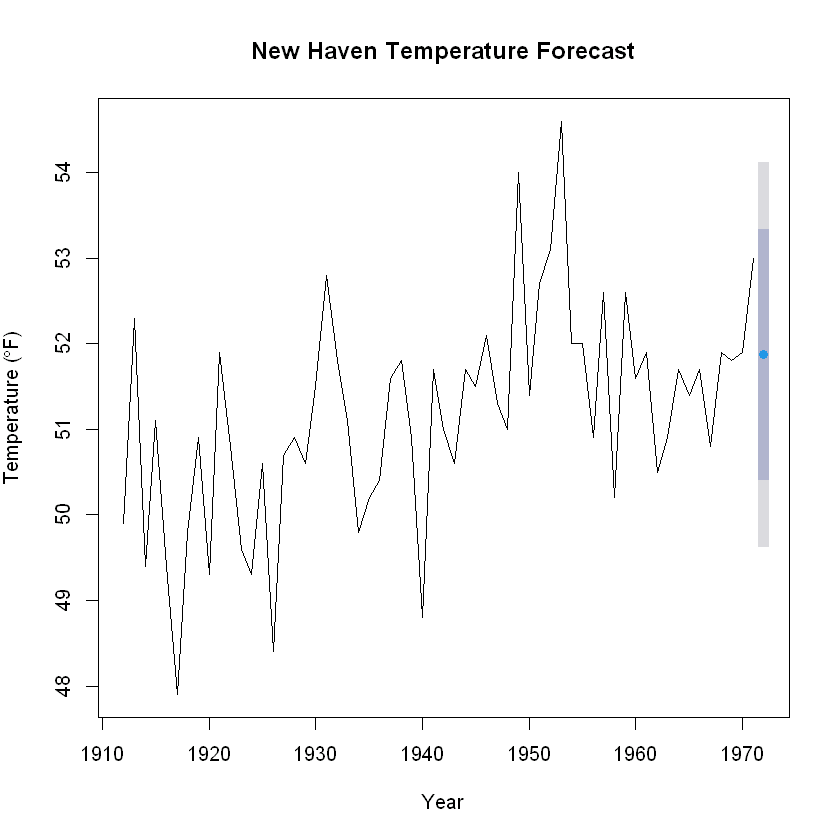

In [21]:
# 向前预测一步
forecast(fit, 1)
plot(
    x = forecast(fit, 1), 
    xlab="Year",
    ylab=expression(paste("Temperature (", degree*F, ")",)),
    main="New Haven Temperature Forecast"
    )

In [22]:
# 得到准确性度量
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.1460657,1.126268,0.8951225,0.2419373,1.7489,0.7512408,-0.006441923


## Holt指数平滑和Holt-Winters指数平滑

In [1]:
library(forecast)
fit <- ets(log(AirPassengers), model="AAA")
fit

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



ETS(A,A,A) 

Call:
ets(y = log(AirPassengers), model = "AAA")

  Smoothing parameters:
    alpha = 0.6975 
    beta  = 0.0031 
    gamma = 1e-04 

  Initial states:
    l = 4.7925 
    b = 0.0111 
    s = -0.1045 -0.2206 -0.0787 0.0562 0.2049 0.2149
           0.1146 -0.0081 -0.0059 0.0225 -0.1113 -0.0841

  sigma:  0.0383

      AIC      AICc       BIC 
-207.1694 -202.3123 -156.6826 

In [2]:
# 预测未来值
pred <- forecast(fit, 5)
pred

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       6.109335 6.060306 6.158365 6.034351 6.184319
Feb 1961       6.092542 6.032679 6.152405 6.000989 6.184094
Mar 1961       6.236626 6.167535 6.305718 6.130960 6.342292
Apr 1961       6.218531 6.141239 6.295823 6.100323 6.336738
May 1961       6.226734 6.141971 6.311498 6.097100 6.356369

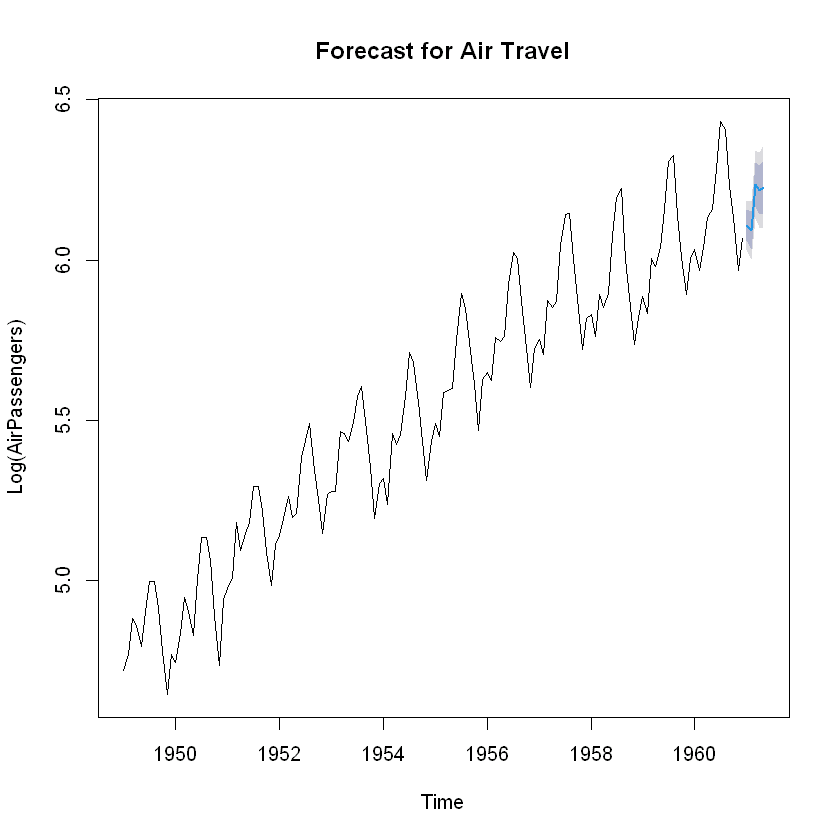

In [3]:
plot(
    pred,
    main="Forecast for Air Travel",
    ylab="Log(AirPassengers)",
    xlab="Time"
)

In [4]:
pred$mean <- exp(pred$mean)
pred$lower <- exp(pred$lower)
pred$upper <- exp(pred$upper)

p <- cbind(pred$mean, pred$lower, pred$upper)
dimnames(p)[[2]]  <- c("mean", "Lo80", "Lo95", "Hi80", "Hi95")
p

,mean,Lo80,Lo95,Hi80,Hi95
Jan 1961,450.0395,428.5065,417.5279,472.6544,485.0826
Feb 1961,442.5448,416.8301,403.8280,469.8459,484.9735
Mar 1961,511.1312,477.0088,459.8775,547.6945,568.0971
Apr 1961,501.9652,464.6289,446.0019,542.3017,564.9506
May 1961,506.1001,464.9691,444.5667,550.8694,576.1504


## ets()函数和自动预测

In [5]:
library(forecast)
fit <- ets(JohnsonJohnson)
fit

ETS(M,A,A) 

Call:
ets(y = JohnsonJohnson)

  Smoothing parameters:
    alpha = 0.2776 
    beta  = 0.0636 
    gamma = 0.5867 

  Initial states:
    l = 0.6276 
    b = 0.0165 
    s = -0.2293 0.1913 -0.0074 0.0454

  sigma:  0.0921

     AIC     AICc      BIC 
163.6392 166.0716 185.5165 

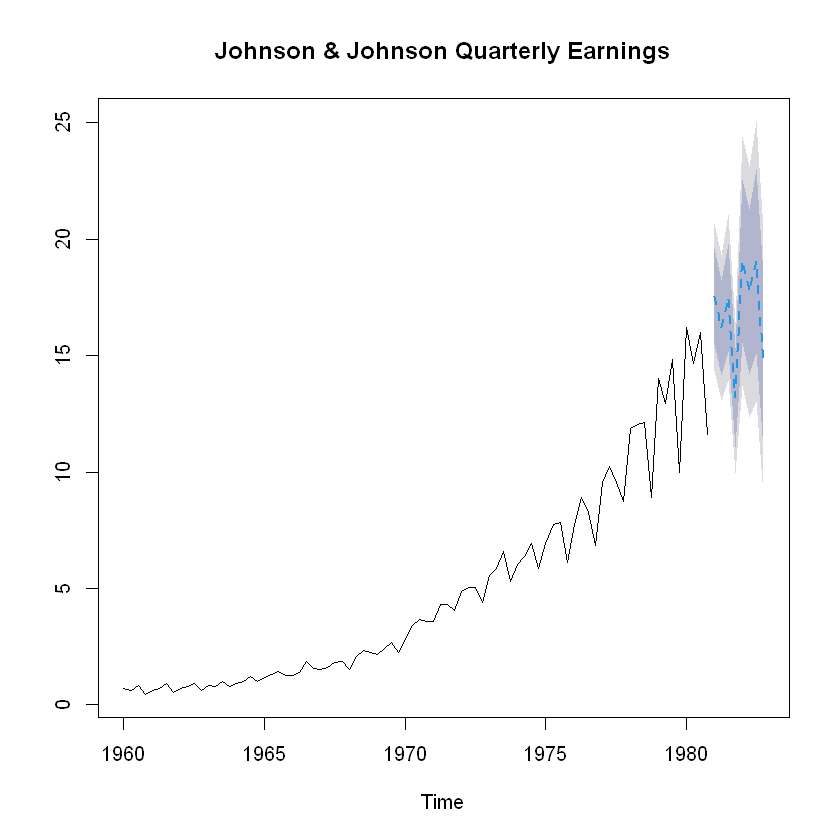

In [6]:
plot(forecast(fit), main="Johnson & Johnson Quarterly Earnings", xlab="Time", flty=2)

# ARIMA预测模型

## ARMA和ARIMA模型

### 验证序列的平稳性

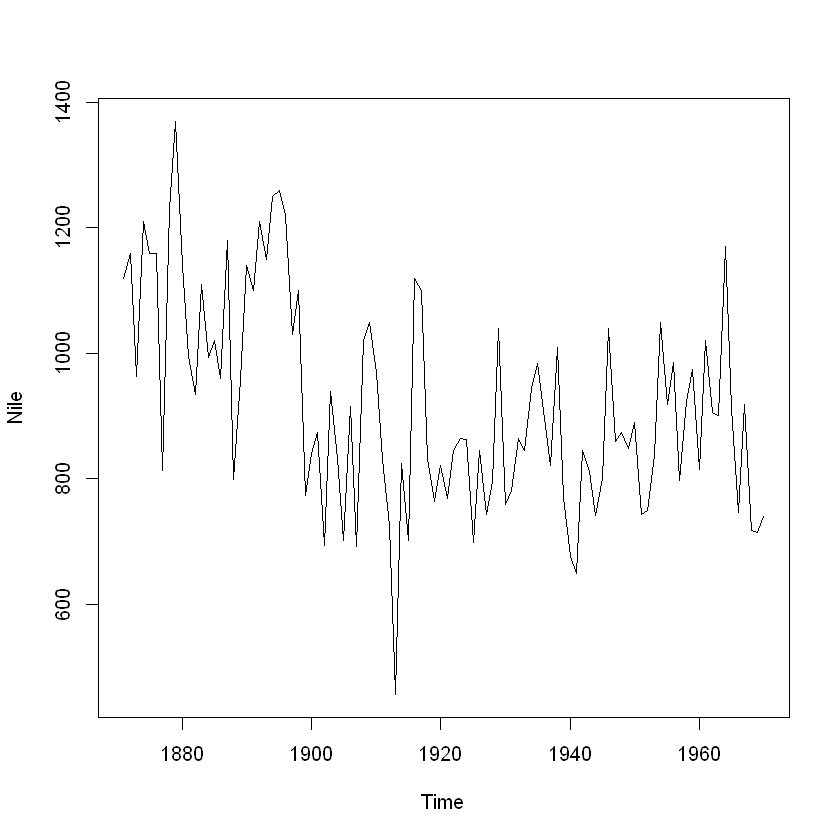

In [8]:
library(forecast)
library(tseries)

plot(Nile)

In [10]:
ndiffs(Nile)

[1] 1

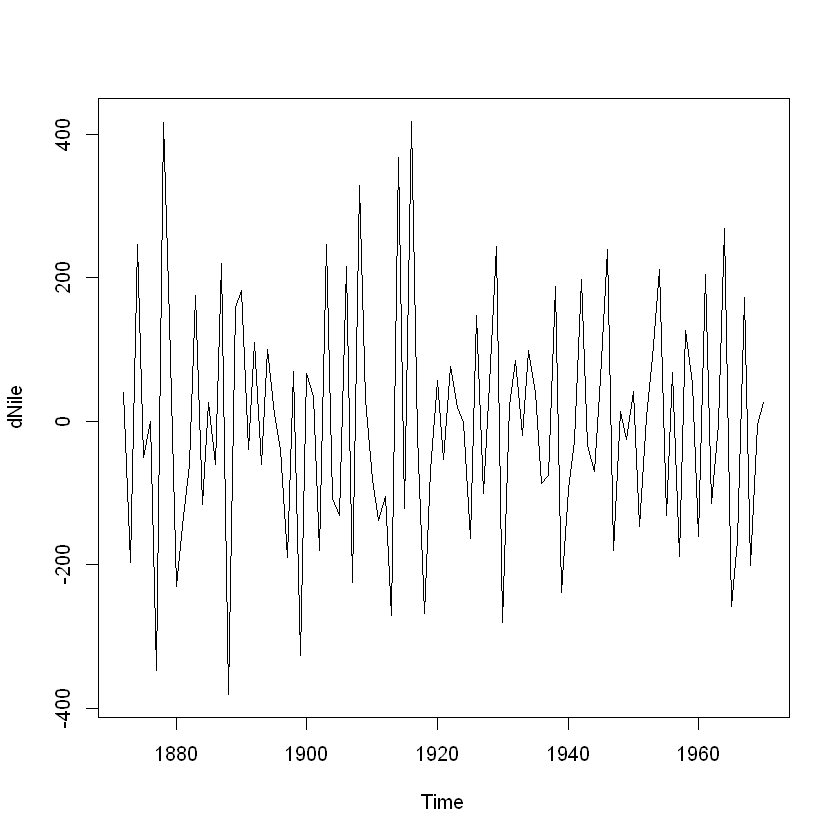

In [11]:
dNile <- diff(Nile)
plot(dNile)

In [12]:
adf.test(dNile)

Warning message in adf.test(dNile):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  dNile
Dickey-Fuller = -6.5924, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


### 选择模型

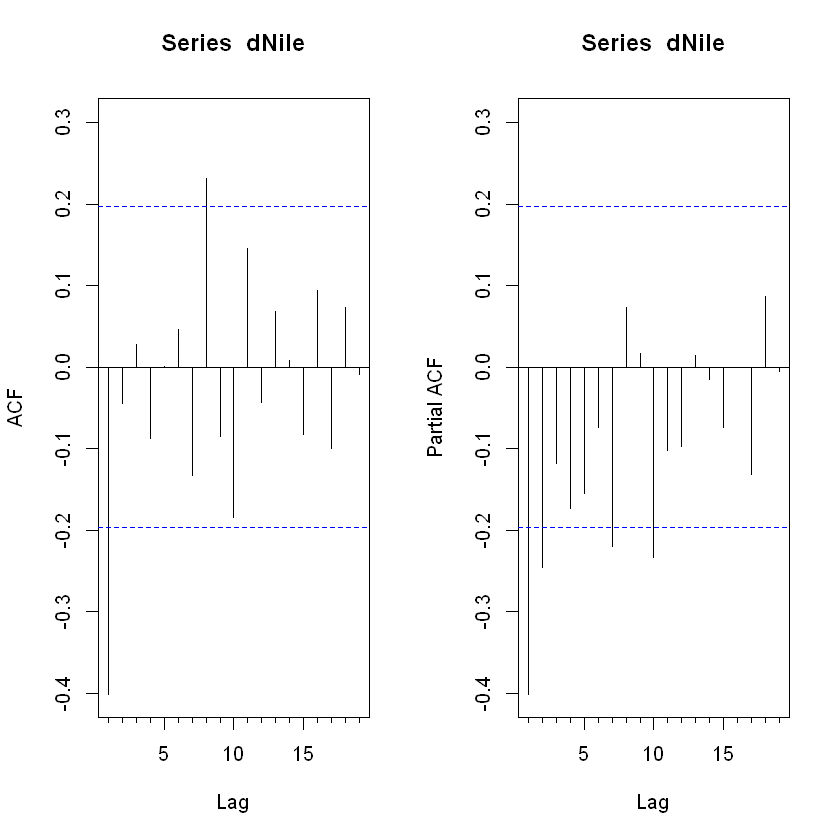

In [13]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(1, 2))
Acf(dNile)
Pacf(dNile)
par(opar)

### 拟合模型

In [14]:
library(forecast)
fit <- arima(Nile, order=c(0, 1, 1))
fit


Call:
arima(x = Nile, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.7329
s.e.   0.1143

sigma^2 estimated as 20600:  log likelihood = -632.55,  aic = 1269.09

In [15]:
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-11.9358,142.8071,112.1752,-3.574702,12.93594,0.841824,0.1153593


### 模型评价

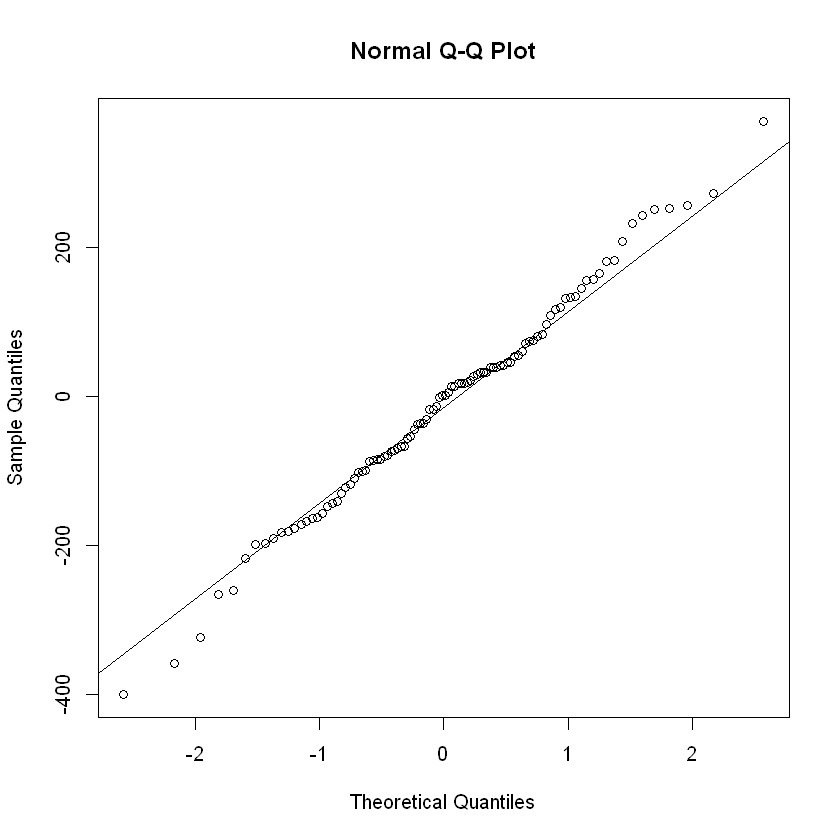

In [18]:
qqnorm(fit$residuals)
qqline(fit$residuals)

In [19]:
Box.test(fit$residuals, type="Ljung-Box")


	Box-Ljung test

data:  fit$residuals
X-squared = 1.3711, df = 1, p-value = 0.2416


### 预测

In [20]:
forecast(fit, 3)

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1971       798.3673 614.4307 982.3040 517.0605 1079.674
1972       798.3673 607.9845 988.7502 507.2019 1089.533
1973       798.3673 601.7495 994.9851 497.6663 1099.068

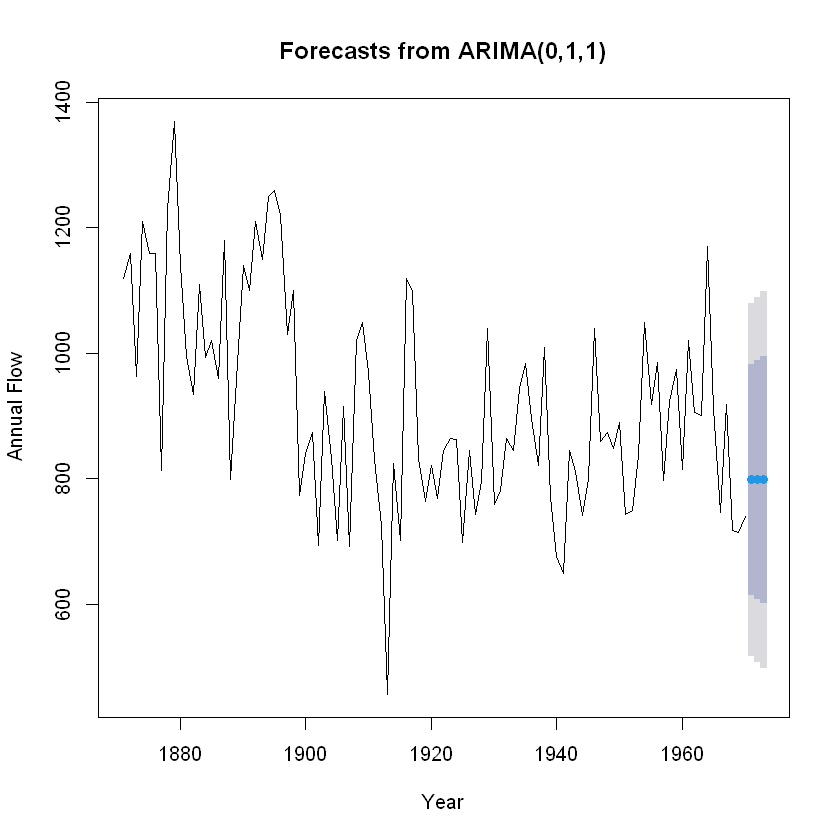

In [21]:
plot(forecast(fit, 3), xlab="Year", ylab="Annual Flow")

## ARIMA的自动预测

In [22]:
library(forecast)
fit <- auto.arima(sunspots)
fit

Series: sunspots 
ARIMA(2,1,2) 

Coefficients:
         ar1      ar2      ma1     ma2
      1.3467  -0.3963  -1.7710  0.8103
s.e.  0.0303   0.0287   0.0205  0.0194

sigma^2 = 243.8:  log likelihood = -11745.5
AIC=23500.99   AICc=23501.01   BIC=23530.71

In [23]:
forecast(fit, 3)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1984       40.43784 20.42717 60.44850 9.834167 71.04150
Feb 1984       41.35311 18.26341 64.44281 6.040458 76.66576
Mar 1984       39.79670 15.23663 64.35677 2.235319 77.35808

In [24]:
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.02672716,15.60055,11.02575,NaN,Inf,0.4775401,-0.01055012
